### This code swaps the magnitude and phase components of two images in their color channels using the Fourier Transform, creating two new images with swapped visual characteristics.


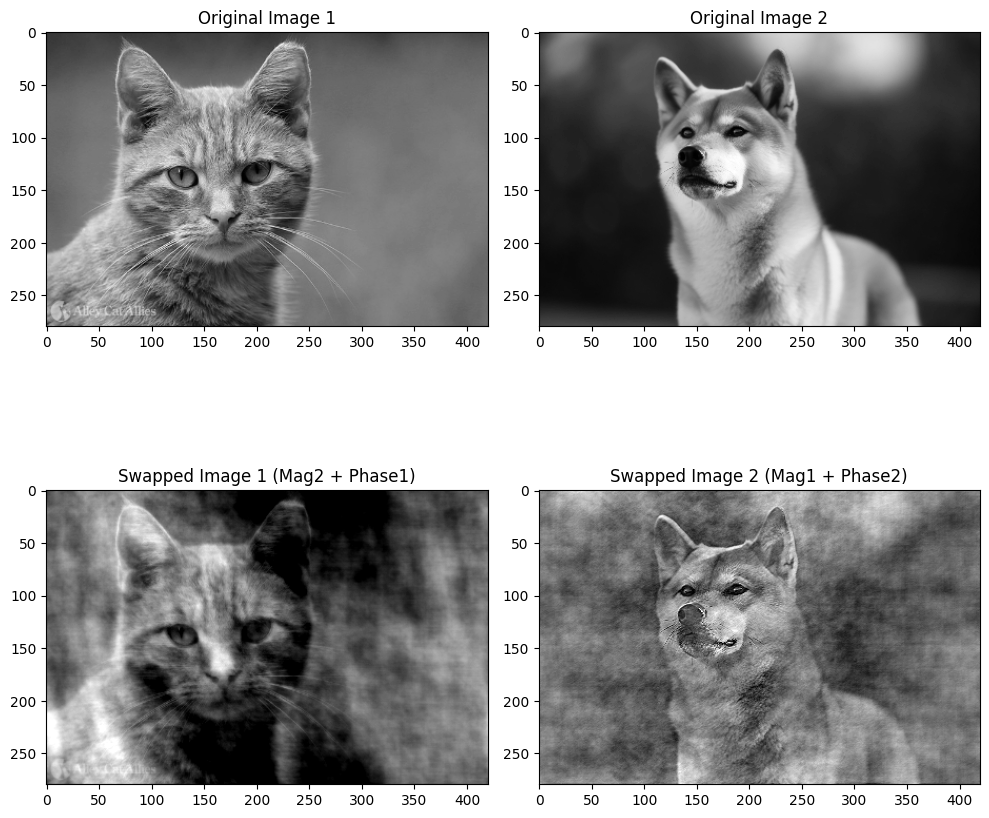

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the images
image1_path = "FELV-cat.jpg"
image2_path = "dog-animal_DOTORLBDD7.jpg"

image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

# Resize images to be the same dimensions
min_shape = (min(image1.shape[0], image2.shape[0]), min(image1.shape[1], image2.shape[1]))
image1 = cv2.resize(image1, min_shape[::-1])
image2 = cv2.resize(image2, min_shape[::-1])

# Compute the Fourier Transforms
f1 = np.fft.fft2(image1)
f2 = np.fft.fft2(image2)

# Compute magnitude and phase
magnitude1, phase1 = np.abs(f1), np.angle(f1)
magnitude2, phase2 = np.abs(f2), np.angle(f2)

# Swap magnitude and phase
new_f1 = magnitude2 * np.exp(1j * phase1)
new_f2 = magnitude1 * np.exp(1j * phase2)

# Compute the inverse Fourier Transforms
swapped_image1 = np.fft.ifft2(new_f1).real
swapped_image2 = np.fft.ifft2(new_f2).real

# Normalize images for display
swapped_image1 = np.uint8(np.clip(swapped_image1, 0, 255))
swapped_image2 = np.uint8(np.clip(swapped_image2, 0, 255))

#Plot
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image 1")
plt.imshow(image1, cmap="gray")

plt.subplot(2, 2, 2)
plt.title("Original Image 2")
plt.imshow(image2, cmap="gray")

plt.subplot(2, 2, 3)
plt.title("Swapped Image 1 (Mag2 + Phase1)")
plt.imshow(swapped_image1, cmap="gray")

plt.subplot(2, 2, 4)
plt.title("Swapped Image 2 (Mag1 + Phase2)")
plt.imshow(swapped_image2, cmap="gray")

plt.tight_layout()
plt.show()


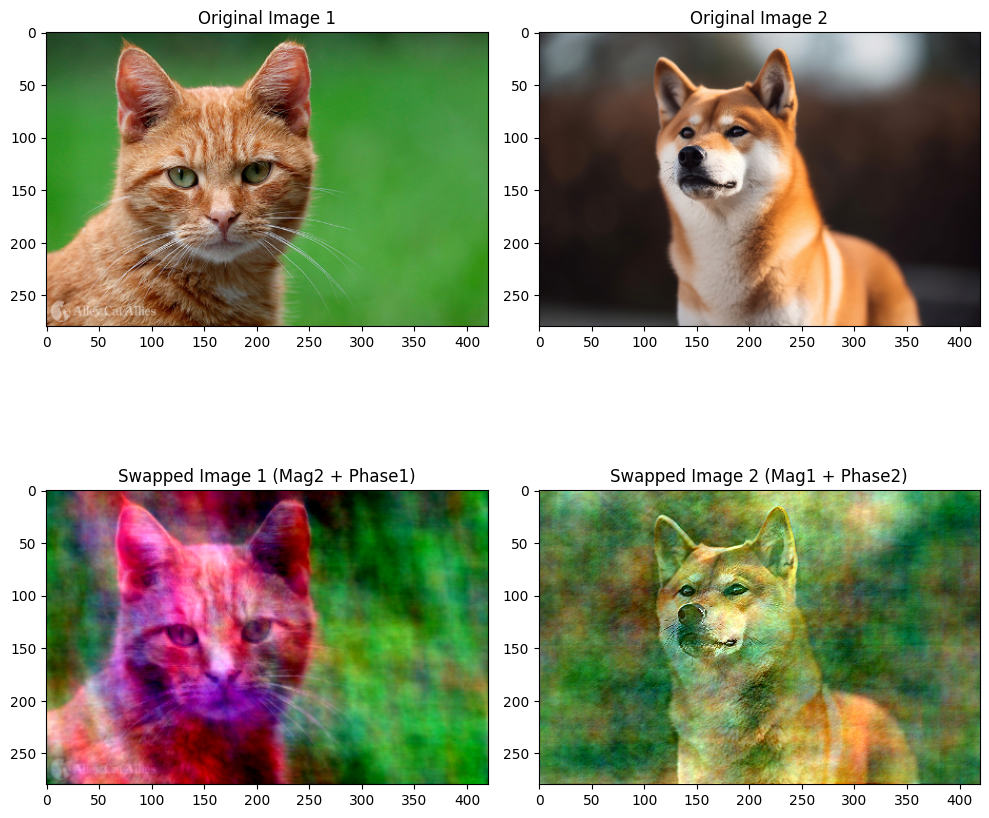

In [ ]:
# Original colors
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image 1")
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title("Original Image 2")
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 3)
plt.title("Swapped Image 1 (Mag2 + Phase1)")
plt.imshow(cv2.cvtColor(swapped_image1, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.title("Swapped Image 2 (Mag1 + Phase2)")
plt.imshow(cv2.cvtColor(swapped_image2, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()
